# Lab 5 - SVM

In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.datasets import load_digits, load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_score, recall_score
import matplotlib.pyplot as plt

### Dataset - Digits

In [2]:
data = load_digits()
x = data['data']
y = data['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)
y_train = y_train.reshape((1437, 1))

standardscaler = StandardScaler()
x_train = standardscaler.fit_transform(x_train)
x_test = standardscaler.transform(x_test)

### Uczenie dla kazdej klasy z osobna

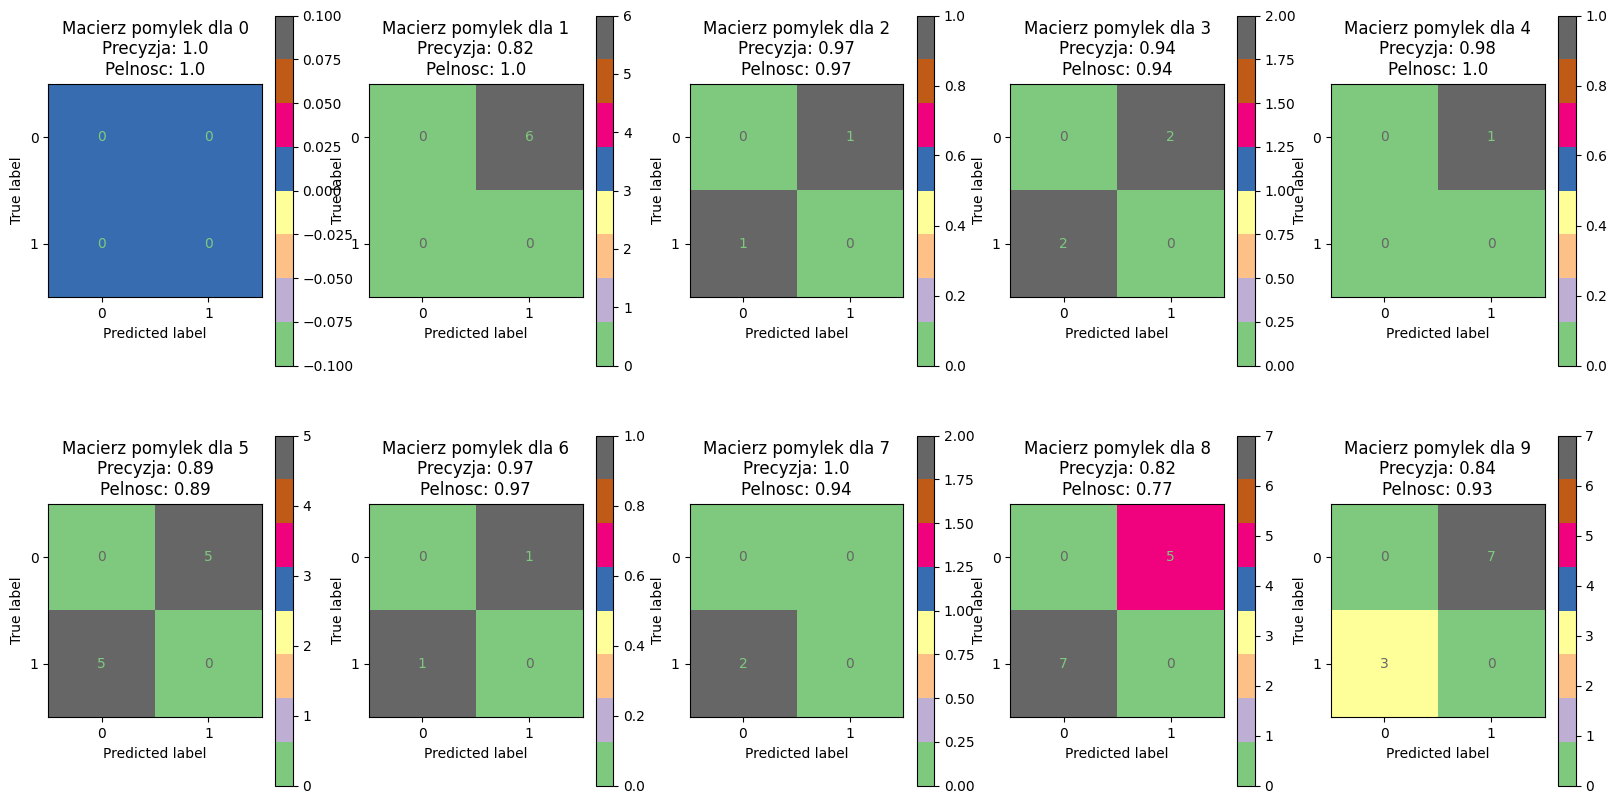

In [3]:
fig, ax = plt.subplots(2, 5)
fig.set_size_inches((20, 10))

for cls_id in range(10):
    y_cls = (y_train == cls_id).astype(np.int8)

    clf = svm.SVC(kernel='linear', C=100, random_state=1, probability=True, decision_function_shape="ovo")
    clf.fit(x_train, y_cls.ravel())

    y_pred = clf.predict(x_test)
    y_test_cls = (y_test == cls_id).astype(np.int8)

    precision = precision_score(y_test_cls, y_pred)
    recall = recall_score(y_test_cls, y_pred)

    cfm = confusion_matrix(y_test_cls, y_pred)
    new_cfm = cfm - np.eye(cfm.shape[0]) * cfm
    new_cfm = ConfusionMatrixDisplay(new_cfm)

    new_cfm.plot(cmap='Accent', ax=ax[int(cls_id / 5), cls_id % 5])
    ax[int(cls_id / 5), cls_id % 5].set_title(f"Macierz pomylek dla {cls_id}\nPrecyzja: {precision:.02}\nPelnosc: {recall:.02}")

plt.show()

### Sprawdzanie wplywu jadra na model

 Jadro - linear				 Jadro - poly				 Jadro - rbf
cls: prec - rec				cls: prec - rec				cls: prec - rec
0: 0.97 - 1.0				0: 1.0 - 1.0				0: 1.0 - 1.0
1: 0.97 - 1.0				1: 1.0 - 1.0				1: 1.0 - 1.0
2: 1.0 - 1.0				2: 1.0 - 1.0				2: 0.97 - 1.0
3: 0.94 - 0.97				3: 0.97 - 0.97				3: 0.97 - 0.97
4: 1.0 - 1.0				4: 1.0 - 1.0				4: 0.98 - 1.0
5: 0.96 - 0.96				5: 0.98 - 0.98				5: 0.98 - 0.98
6: 0.97 - 0.97				6: 1.0 - 1.0				6: 0.97 - 1.0
7: 0.97 - 0.97				7: 1.0 - 0.97				7: 1.0 - 0.94
8: 1.0 - 0.93				8: 0.94 - 1.0				8: 0.97 - 0.97
9: 0.97 - 0.95				9: 0.97 - 0.95				9: 0.97 - 0.95


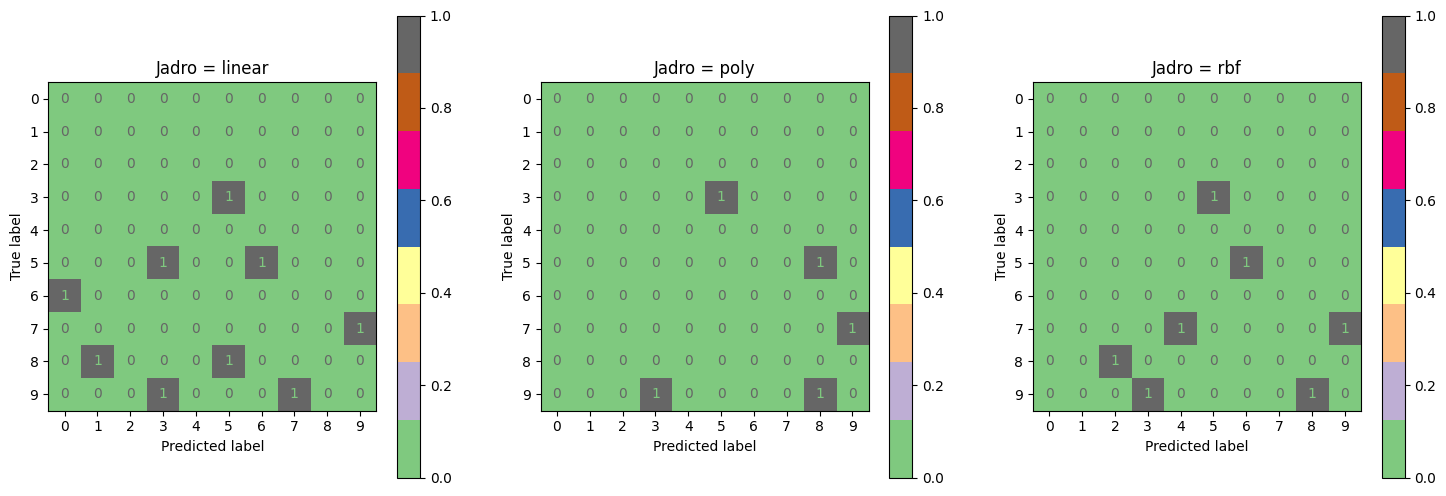

In [4]:
kernels = ["linear", "poly", "rbf"]
fig, ax = plt.subplots(1, 3)
fig.set_size_inches((18, 6))

precisions = []
recalls = []

for i in range(3):
    kernel_type = kernels[i]
    clf = svm.SVC(kernel=kernel_type, C=100, random_state=1, probability=True, decision_function_shape="ovo")
    clf.fit(x_train, y_train.ravel())

    y_pred = clf.predict(x_test)
    precisions.append(precision_score(y_test, y_pred, average=None))
    recalls.append(recall_score(y_test, y_pred, average=None))

    cfm = confusion_matrix(y_test, y_pred)
    new_cfm = cfm - np.eye(cfm.shape[0]) * cfm
    new_cfm = ConfusionMatrixDisplay(new_cfm)

    new_cfm.plot(cmap='Accent', ax=ax[i])
    ax[i].set_title(f"Jadro = {kernel_type}")


print(" Jadro - linear\t\t\t\t Jadro - poly\t\t\t\t Jadro - rbf")
print("cls: prec - rec\t\t\t\tcls: prec - rec\t\t\t\tcls: prec - rec")
for i in range(10):
    line = f"{i}: {precisions[0][i]:.02} - {recalls[0][i]:.02}\t\t\t\t" \
           f"{i}: {precisions[1][i]:.02} - {recalls[1][i]:.02}\t\t\t\t" \
           f"{i}: {precisions[2][i]:.02} - {recalls[2][i]:.02}"
    print(line)

plt.show()

### Sprawdzanie wplywu parametru regularyzacji na model

Regularyzacja: 0.5			Regularyzacja: 3			Regularyzacja: 10
cls: prec - rec				cls: prec - rec				cls: prec - rec
0: 1.0 - 0.97				0: 1.0 - 0.97				0: 1.0 - 1.0
1: 1.0 - 0.89				1: 1.0 - 1.0				1: 1.0 - 1.0
2: 1.0 - 0.88				2: 1.0 - 1.0				2: 1.0 - 1.0
3: 1.0 - 0.88				3: 0.97 - 0.97				3: 0.97 - 0.97
4: 1.0 - 1.0				4: 1.0 - 1.0				4: 1.0 - 1.0
5: 0.98 - 0.89				5: 0.98 - 0.98				5: 0.98 - 0.98
6: 1.0 - 0.97				6: 1.0 - 1.0				6: 1.0 - 1.0
7: 1.0 - 0.97				7: 1.0 - 0.97				7: 1.0 - 0.97
8: 0.56 - 1.0				8: 0.88 - 1.0				8: 0.94 - 1.0
9: 0.94 - 0.8				9: 0.97 - 0.93				9: 0.97 - 0.95


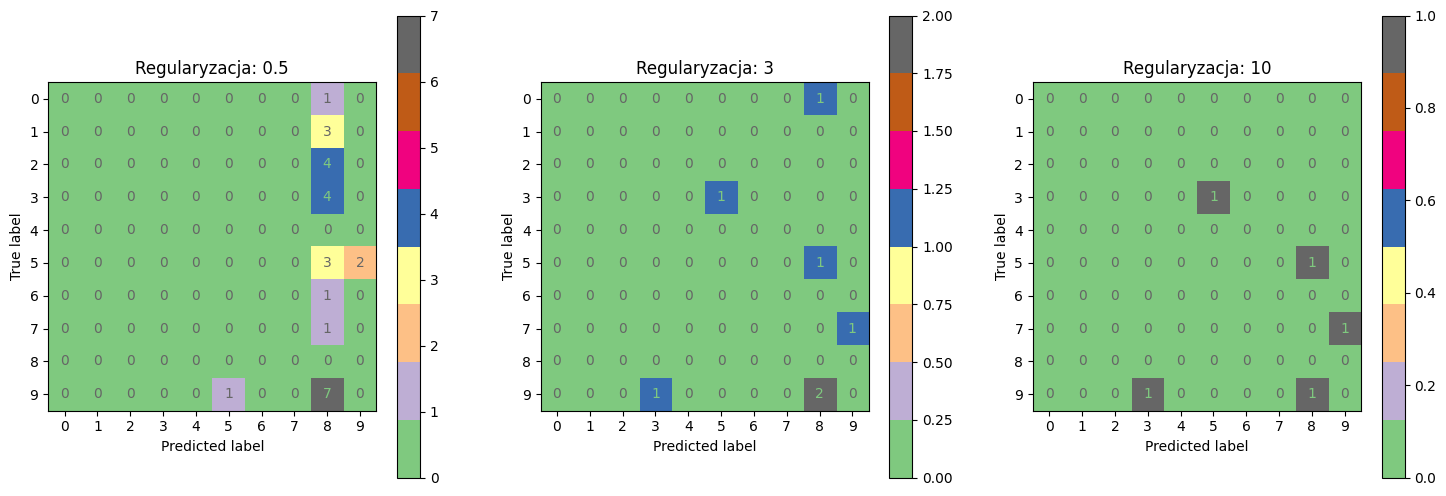

In [5]:
reg_params = [0.5, 3, 10]
fig, ax = plt.subplots(1, 3)
fig.set_size_inches((18, 6))

precisions = []
recalls = []

for i in range(3):
    reg_param = reg_params[i]
    clf = svm.SVC(kernel="poly", C=reg_param, random_state=1, probability=True, decision_function_shape="ovo")
    clf.fit(x_train, y_train.ravel())

    y_pred = clf.predict(x_test)
    precisions.append(precision_score(y_test, y_pred, average=None))
    recalls.append(recall_score(y_test, y_pred, average=None))

    cfm = confusion_matrix(y_test, y_pred)
    new_cfm = cfm - np.eye(cfm.shape[0]) * cfm
    new_cfm = ConfusionMatrixDisplay(new_cfm)

    new_cfm.plot(cmap='Accent', ax=ax[i])
    ax[i].set_title(f"Regularyzacja: {reg_param}")


print("Regularyzacja: 0.5\t\t\tRegularyzacja: 3\t\t\tRegularyzacja: 10")
print("cls: prec - rec\t\t\t\tcls: prec - rec\t\t\t\tcls: prec - rec")
for i in range(10):
    line = f"{i}: {precisions[0][i]:.02} - {recalls[0][i]:.02}\t\t\t\t" \
           f"{i}: {precisions[1][i]:.02} - {recalls[1][i]:.02}\t\t\t\t" \
           f"{i}: {precisions[2][i]:.02} - {recalls[2][i]:.02}"
    print(line)

plt.show()

### Dataset - Wine

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

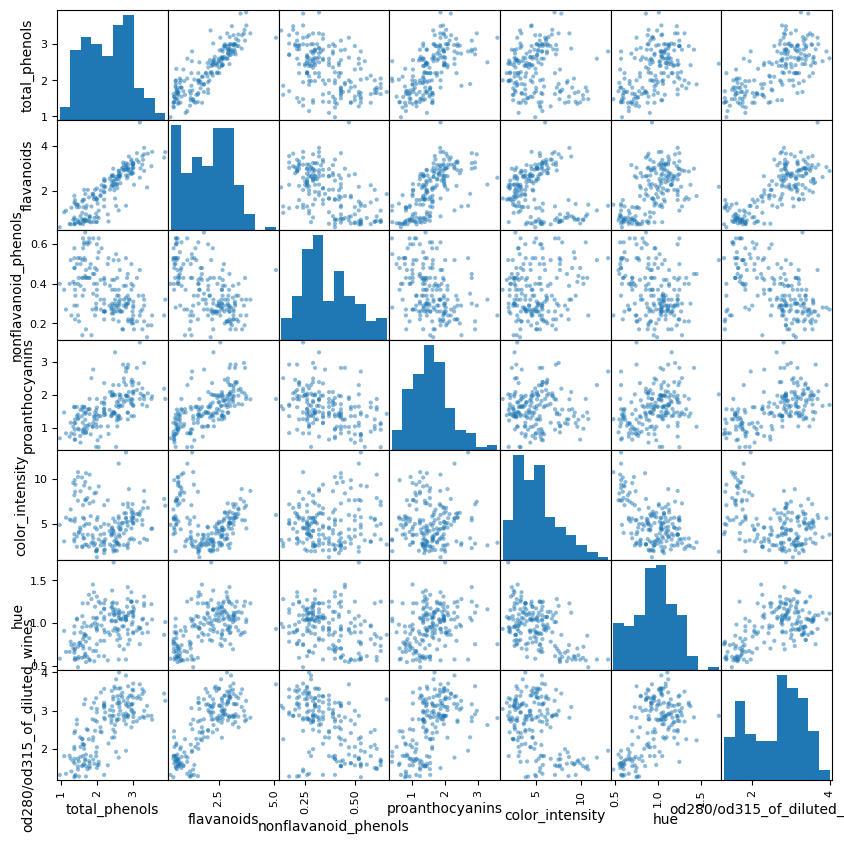

In [6]:
data = load_wine()
X = data["data"]
y = data["target"]

print(data["DESCR"])
features = data["feature_names"]
df = pd.DataFrame(X, columns=features)

pd.plotting.scatter_matrix(df[features[5:12]], figsize=(10, 10))
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.reshape((y_train.shape[0], 1))

standardscaler = StandardScaler()
polyfeatures = PolynomialFeatures(degree=3)

X_train = standardscaler.fit_transform(X_train)
X_test = standardscaler.transform(X_test)

X_train = polyfeatures.fit_transform(X_train)
X_test = polyfeatures.transform(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



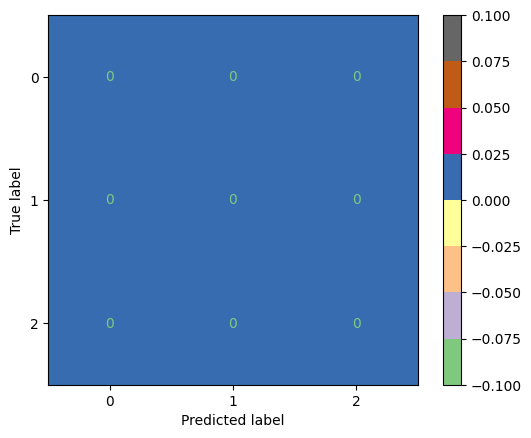

In [8]:
# clf = svm.SVC(kernel='linear', C=0.75, probability=True, random_state=1)
clf = svm.LinearSVC(penalty='l2', C=0.75, random_state=1, dual=False, max_iter=int(1e5))
clf.fit(X_train, y_train.ravel())

y_pred = clf.predict(X_test)

report = classification_report(y_test, y_pred)

cfm = confusion_matrix(y_test, y_pred)
new_cfm = cfm - np.eye(cfm.shape[0]) * cfm
new_cfm = ConfusionMatrixDisplay(new_cfm)
new_cfm.plot(cmap='Accent')

print(report)
plt.show()